# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
car_df = pd.read_csv('C:\\Users\\Ganesh Valtule\\OneDrive - IIT Kanpur\\Machine Learning Projects\\Project 1\\Car_Purchasing_Data.csv',encoding='ISO-8859-1')
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Female,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,Female,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,Male,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,Male,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Male,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


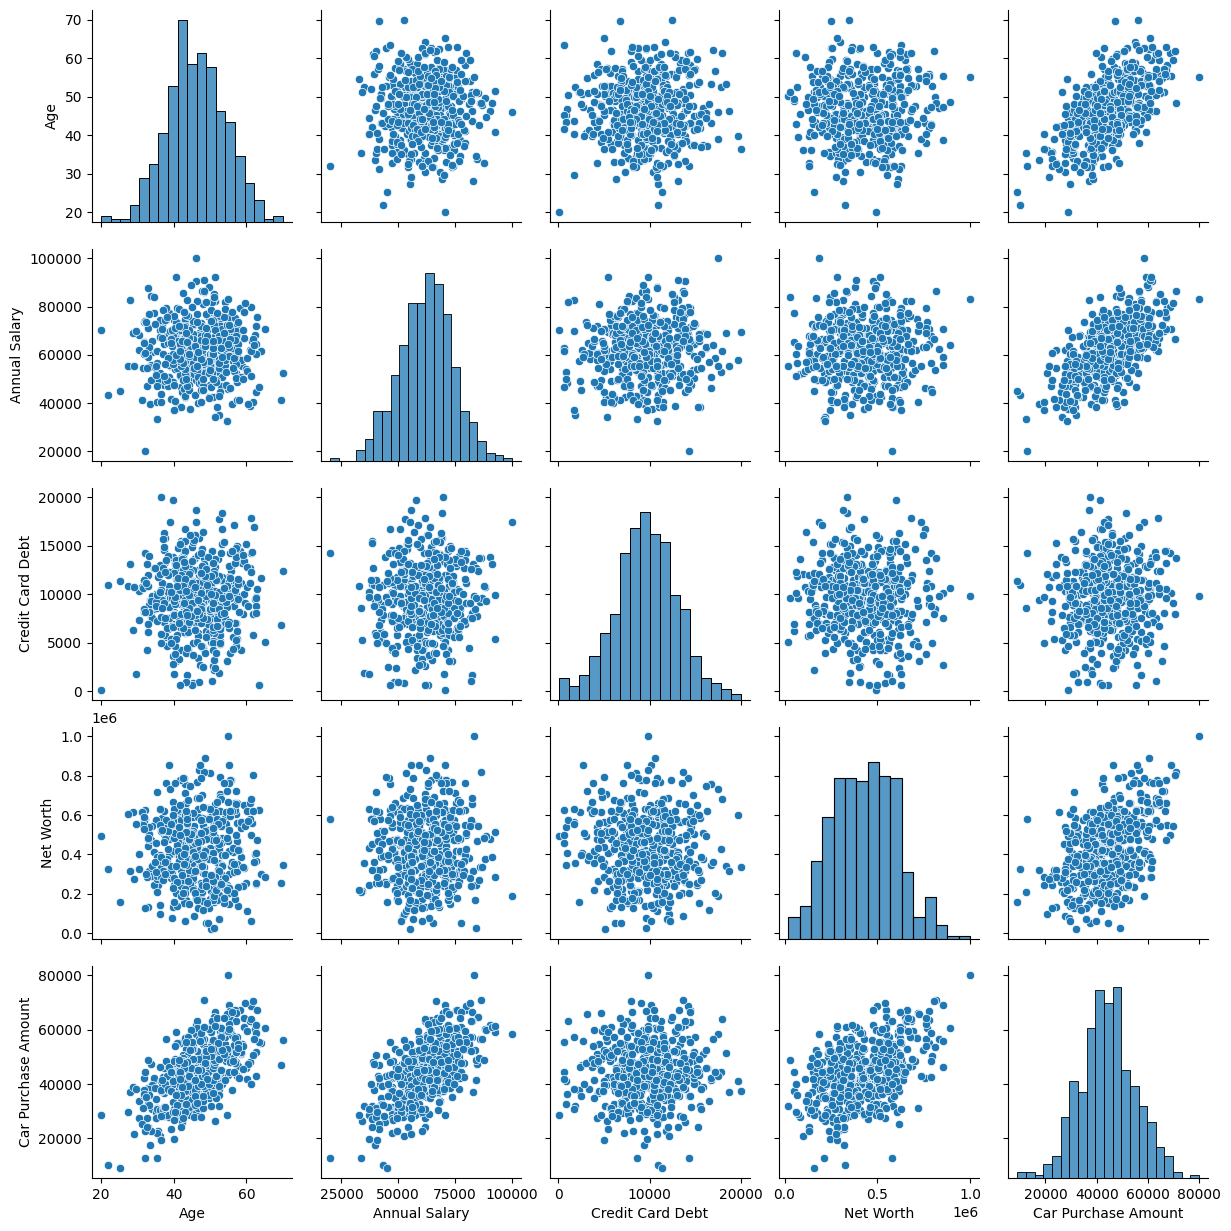

In [3]:
# Visualizing the dataset
sns.pairplot(car_df)

# Data cleaning to prepare data for training

In [4]:
input_data = car_df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'], axis = 1)
input_data


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,Female,41.851720,62812.09301,11609.380910,238961.2505
1,Female,40.870623,66646.89292,9572.957136,530973.9078
2,Male,43.152897,53798.55112,11160.355060,638467.1773
3,Male,58.271369,79370.03798,14426.164850,548599.0524
4,Male,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,Female,41.462515,71942.40291,6995.902524,541670.1016
496,Male,37.642000,56039.49793,12301.456790,360419.0988
497,Male,53.943497,68888.77805,10611.606860,764531.3203
498,Male,59.160509,49811.99062,14013.034510,337826.6382


In [5]:
# Gender is in the form of Male and Female so we will convert that into numrical data type
# by replacing Male by 1 and Female by 0.
input_data['Gender'] = input_data['Gender'].replace({'Male':1,'Female':0})
input_data

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [6]:
input_data.shape

(500, 5)

In [7]:
act_output = car_df['Car Purchase Amount']
act_output

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [8]:
act_output.shape

(500,)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Scaling Input Data
Scaled_input_data = scaler.fit_transform(input_data)
Scaled_input_data

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [11]:
# Printing Maximum Values of unscaled data
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [12]:
# Printing Minimum Values of unscaled data
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [13]:
# Scaling Actual Output Data
act_output = act_output.values.reshape(-1,1)
act_output

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [14]:
# Scaling actual output
Scaled_act_output = scaler.fit_transform(act_output)
Scaled_act_output

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# Training the Machine Learning Model

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Scaled_input_data,Scaled_act_output,test_size = 0.15)

In [16]:
X_train.shape

(425, 5)

In [17]:
X_test.shape

(75, 5)

In [18]:
#Importing tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(20,input_dim = 5,activation = 'linear'))
model.add(Dense(20,activation = 'linear'))
model.add(Dense(1,activation = 'linear'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [21]:
epoch_hist = model.fit(X_train,y_train, epochs = 20, batch_size = 25, verbose = 1, validation_split = 0.2)

Epoch 1/20
14/14 [==============================] - 1s 16ms/step - loss: 0.2161 - val_loss: 0.0197
Epoch 2/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.0387
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0154 - val_loss: 0.0128
Epoch 4/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0102
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0080
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 8/20
14/14 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0064
Epoch 9/20
14/14 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0061
Epoch 10/20
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 11/20
14/14 

# Evaluating the Model

In [22]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

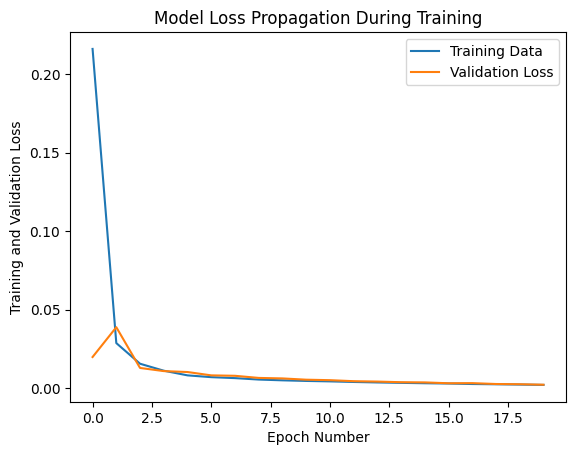

In [23]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Propagation During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Data','Validation Loss'])

# Testing the Model

In [24]:
X_test = np.array([[1,50,500000,10000,600000]])
y_predict = model.predict(X_test)

1/1 [==============================] - 0s 73ms/step


In [25]:
print('Expected Purchase Amount',y_predict)

Expected Purchase Amount [[407102.03]]
